# Import des librairies

In [55]:
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, Conv2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Chargement des photos

In [56]:
train_path = "dataset/training_set/"
test_path = "dataset/test_set/"
classes = os.listdir(train_path)

In [57]:
print(classes)

['cats', 'dogs']


In [58]:
# Initialising the CNN
classifier = Sequential([
    Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'), # Step 1 - Convolution
    MaxPooling2D(pool_size = (2, 2)), # Step 2 - Pooling
    Conv2D(32, (3, 3), activation = 'relu'), # Adding a second convolutional layer
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(), # Step 3 - Flattening
    Dense(units = 128, activation = 'relu'), # Step 4 - Full connection
    Dense(units = 1, activation = 'sigmoid')
])

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [60]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [61]:
history = classifier.fit(training_set, epochs = 20, validation_data = test_set, batch_size=16)

Epoch 1/20
250/250 [==============================] - 24s 93ms/step - loss: 0.6864 - accuracy: 0.5440 - val_loss: 0.5925 - val_accuracy: 0.6910
Epoch 2/20
250/250 [==============================] - 20s 82ms/step - loss: 0.6209 - accuracy: 0.6463 - val_loss: 0.5728 - val_accuracy: 0.7005
Epoch 3/20
250/250 [==============================] - 26s 103ms/step - loss: 0.5823 - accuracy: 0.6930 - val_loss: 0.5250 - val_accuracy: 0.7455
Epoch 4/20
250/250 [==============================] - 22s 90ms/step - loss: 0.5311 - accuracy: 0.7368 - val_loss: 0.4952 - val_accuracy: 0.7635
Epoch 5/20
250/250 [==============================] - 23s 91ms/step - loss: 0.5106 - accuracy: 0.7411 - val_loss: 0.5337 - val_accuracy: 0.7295
Epoch 6/20
250/250 [==============================] - 23s 92ms/step - loss: 0.4926 - accuracy: 0.7549 - val_loss: 0.4864 - val_accuracy: 0.7735
Epoch 7/20
250/250 [==============================] - 23s 92ms/step - loss: 0.4647 - accuracy: 0.7748 - val_loss: 0.4921 - val_accuracy

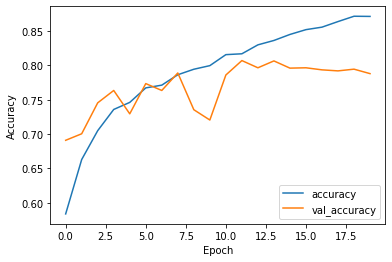

In [62]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [63]:
loss, accuracy = classifier.evaluate(test_set)
print(f"Test accuracy: {accuracy}")

63/63 [==============================] - 2s 29ms/step - loss: 0.5168 - accuracy: 0.7880
Test accuracy: 0.7879999876022339


In [71]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training_set.image_shape),
	MaxPooling2D(pool_size = (2, 2)),
	Dropout(rate = 0.3),
	Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
	MaxPooling2D(pool_size = (2, 2)),
	Dropout(rate = 0.2),
	Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'),
	MaxPooling2D(pool_size = (2, 2)),
	Dropout(rate = 0.15),
	Flatten(),
	Dense(units = 32, activation = 'relu'),
	Dropout(rate = 0.15),
	Dense(units = 64, activation = 'relu'),
	Dropout(rate = 0.1),
	Dense(units = len(set(training_set.classes)), activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_set, epochs = 25, validation_data = test_set, batch_size=32)

Epoch 1/25
250/250 [==============================] - 29s 111ms/step - loss: 0.6968 - accuracy: 0.4985 - val_loss: 0.6897 - val_accuracy: 0.6060
Epoch 2/25
250/250 [==============================] - 25s 100ms/step - loss: 0.6832 - accuracy: 0.5714 - val_loss: 0.6536 - val_accuracy: 0.6270
Epoch 3/25
250/250 [==============================] - 25s 99ms/step - loss: 0.6454 - accuracy: 0.6378 - val_loss: 0.6909 - val_accuracy: 0.5800
Epoch 4/25
250/250 [==============================] - 26s 105ms/step - loss: 0.6349 - accuracy: 0.6384 - val_loss: 0.5854 - val_accuracy: 0.6905
Epoch 5/25
250/250 [==============================] - 28s 112ms/step - loss: 0.5979 - accuracy: 0.6774 - val_loss: 0.5598 - val_accuracy: 0.7130
Epoch 6/25
250/250 [==============================] - 27s 107ms/step - loss: 0.5716 - accuracy: 0.6933 - val_loss: 0.5460 - val_accuracy: 0.7205
Epoch 7/25
250/250 [==============================] - 27s 109ms/step - loss: 0.5624 - accuracy: 0.6990 - val_loss: 0.4924 - val_acc

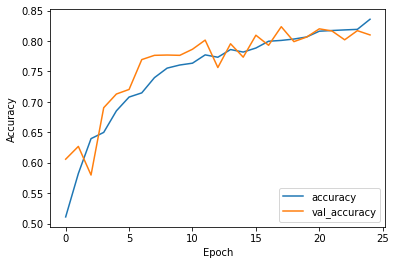

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [73]:
loss, accuracy = model.evaluate(test_set)
print(f"Test accuracy: {accuracy}")

63/63 [==============================] - 2s 31ms/step - loss: 0.4135 - accuracy: 0.8100
Test accuracy: 0.8100000023841858
